# PhonePe- Analysis

In [55]:
## Important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Extra Formating Codes

pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings('ignore')

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

#### Task 1: Data Loading and Understanding.

In [57]:
# 1. Loaded the 'State_Txn' and 'Users' datasets and previewed the first five rows to gain an initial understanding of the data structure.

State_txn= pd.read_excel("Phonepe_raw_data.xlsx", sheet_name= "State_Txn and Users")

State_txn.head(5)

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,14631761.222,2197.621,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,28338535.508,2498.989,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,55557471.134,3415.768,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,90548336.074,3811.278,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,102299740.673,3355.630,18596,0


In [58]:
# 2. Examined the last ten rows of the 'State_Txn' and 'Users' datasets to identify patterns at the end of the dataset.

State_txnsplit= pd.read_excel("Phonepe_raw_data.xlsx", sheet_name = "State_TxnSplit")

State_txnsplit.tail(10)

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
2504,West Bengal,2021,1,Peer-to-peer payments,53869075,202240249482.853,3754.292
2505,West Bengal,2021,1,Merchant payments,37143701,28918343691.018,778.553
2506,West Bengal,2021,1,Recharge & bill payments,26673733,11339665944.691,425.125
2507,West Bengal,2021,1,Financial Services,166727,175445811.884,1052.294
2508,West Bengal,2021,1,Others,400816,263502545.074,657.415
2509,West Bengal,2021,2,Peer-to-peer payments,64661051,230812278789.299,3569.572
2510,West Bengal,2021,2,Merchant payments,41696787,34787867208.319,834.306
2511,West Bengal,2021,2,Recharge & bill payments,34799709,13331453857.609,383.091
2512,West Bengal,2021,2,Financial Services,190537,186466487.631,978.637
2513,West Bengal,2021,2,Others,549353,316744715.705,576.578


In [59]:
# 3. Loaded the 'State_DeviceData' dataset and displayed ten random rows from the middle to observe data distribution.

State_devicedata = pd.read_excel("Phonepe_raw_data.xlsx", sheet_name = "State_DeviceData")

start = len(State_devicedata)/2 - 5
end = len(State_devicedata)/2 + 5

State_devicedata.loc[start:end]

,State,Year,Quarter,Brand,Registered Users,Percentage
2767,Ladakh,2021,2,OnePlus,1741,0.023
2768,Ladakh,2021,2,Motorola,922,0.012
2769,Ladakh,2021,2,Huawei,894,0.012
2770,Ladakh,2021,2,Lenovo,490,0.007
2771,Ladakh,2021,2,Others,2610,0.035
2772,Lakshadweep,2018,1,Samsung,102,0.204
2773,Lakshadweep,2018,1,Xiaomi,100,0.200
2774,Lakshadweep,2018,1,Vivo,67,0.134
2775,Lakshadweep,2018,1,Oppo,56,0.112
2776,Lakshadweep,2018,1,Huawei,25,0.050


In [60]:
# 4. Loaded the 'District_Txn' and 'Users' datasets, displaying both the first and last ten rows for a comprehensive preview.

District_txn= pd.read_excel("Phonepe_raw_data.xlsx", sheet_name = "District_Txn and Users")

District_txn.head(10)
District_txn.tail(10)

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
10238,West Bengal,2021,2,Murshidabad,WB14,8602251,19996935608.243,2324.617,1248602,16530655
10239,West Bengal,2021,2,Nadia,WB15,5524174,11227582723.377,2032.446,955428,13665885
10240,West Bengal,2021,2,North Twenty Four Parganas,WB16,17258291,30414821772.929,1762.331,2660664,37899453
10241,West Bengal,2021,2,Paschim Bardhaman,WB17,4893774,8731262893.730,1784.157,789026,10545670
10242,West Bengal,2021,2,Paschim Medinipur,WB18,5051834,10303513378.800,2039.559,856640,16201033
10243,West Bengal,2021,2,Purba Bardhaman,WB19,3920729,7572502416.239,1931.402,787970,12128849
10244,West Bengal,2021,2,Purba Medinipur,WB20,6418522,15155067721.273,2361.146,946277,15491958
10245,West Bengal,2021,2,Purulia,WB21,1895981,2790996372.037,1472.059,435131,8843358
10246,West Bengal,2021,2,South Twenty Four Parganas,WB22,6661813,13398529483.673,2011.244,1286588,19344293
10247,West Bengal,2021,2,Uttar Dinajpur,WB23,2253385,5564220751.049,2469.272,392388,8184990


In [61]:
# 5. Loaded the 'District Demographics' dataset and sampled every 10th row to check data consistency.

District_demo= pd.read_excel("Phonepe_raw_data.xlsx", sheet_name= "District Demographics")

District_demo[0:len(District_demo)+1:10]

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.000,213,AP01,Anantapur
10,Andhra Pradesh,Visakhapatnam,Visakhapatnam,4288113,11161.000,384,AP10,Visakhapatnam
20,Arunachal Pradesh,Lepa Rada,Basar,0,0.000,0,AR08,Lepa Rada
30,Arunachal Pradesh,Siang,Pangin,31920,2919.000,11,AR18,Siang
40,Assam,Barpeta,Barpeta,1693622,3245.000,520,AS03,Barpeta
...,...,...,...,...,...,...,...,...
700,Chandigarh,Chandigarh,Chandigarh,1055450,114.000,9258,CH01,Chandigarh
710,Jammu & Kashmir,Jammu,Jammu,1526406,3097.000,596,JK07,Jammu
720,Jammu & Kashmir,Samba,Samba,318611,913.000,318,JK17,Samba
730,Delhi,North Delhi,Sadar Bazaar,887978,59.000,14557,DL04,North


#### 1.2: Display basic statistics and data types for each dataset

In [62]:
# 1. Generated summary statistics (mean, median, standard deviation, etc.) for numerical columns to understand data distribution.

State_txn.describe()
State_txnsplit.describe()
State_devicedata.describe()
District_txn.describe()
District_demo.describe()

,Population,Area (sq km),Density
count,742.000,742.000,742.000
mean,1668554.615,4395.373,838.512
std,1458849.181,4254.676,2754.407
min,0.000,0.000,0.000
25%,653081.500,2039.750,198.000
50%,1322359.000,3402.500,353.000
75%,2297440.000,5432.750,686.250
max,10082852.000,45652.000,36155.000


In [63]:
# 2. Examined data types for all columns across datasets to verify consistency and detect potential mismatches.

State_txn.info()
State_txnsplit.info()
State_devicedata.info()
District_txn.info()
District_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             504 non-null    object 
 1   Year              504 non-null    int64  
 2   Quarter           504 non-null    int64  
 3   Transactions      504 non-null    int64  
 4   Amount (INR)      503 non-null    float64
 5   ATV (INR)         504 non-null    float64
 6   Registered Users  504 non-null    int64  
 7   App Opens         504 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 31.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             2514 non-null   object 
 1   Year              2514 non-null   int64  
 2   Quarter           2514 non-null   int64  
 3   Transaction Type 

#### 1.3: Check for missing values

In [64]:
# 1. Checked for missing values across all datasets to ensure data completeness.

State_txn.isnull().sum() #Is Missing the 1 value from Amount (INR)
State_txnsplit.isnull().sum()
State_devicedata.isnull().sum()
District_txn.isnull().sum() # Is missing 28 values from Code
District_demo.isnull().sum()

State             0
District          0
Headquarters      0
Population        0
Area (sq km)      0
Density           0
Code              0
Alternate Name    0
dtype: int64

In [65]:
# 2. Computed the percentage of missing values per column to assess data quality.

## Missing values.
State_txn.isnull().mean()*100  # Amount (INR) column is missing the highest % of data from the dataset State_txn with 0.198%
State_txnsplit.isnull().mean()*100
State_devicedata.isnull().mean()*100
District_txn.isnull().mean()*100 # Code column is missing the highest % of data from the dataset District_txn wutb 0.273%
District_demo.isnull().mean()*100

# Another Way
# (State_txn.isnull().sum()/State_txn.shape[0])*100
# (State_txnsplit.isnull().sum()/State_txnsplit.shape[0])*100
# (State_devicedata.isnull().sum()/State_devicedata.shape[0])*100
# (District_txn.isnull().sum()/District_txn.shape[0])*100
# (District_demo.isnull().sum()/District_demo.shape[0])*100

State            0.000
District         0.000
Headquarters     0.000
Population       0.000
Area (sq km)     0.000
Density          0.000
Code             0.000
Alternate Name   0.000
dtype: float64

In [66]:
# 3. Identified the column with the highest missing values percentage in each dataset to prioritize data cleaning efforts.

# Will give the first column as the output as there is o missing value %.
(State_txnsplit.isnull().mean()*100).idxmax() # Default First column.
(State_devicedata.isnull().mean()*100).idxmax() # Default First column.
(District_demo.isnull().mean()*100).idxmax() # Default First column.

# Will give the column name with the highest missing value %.
(State_txn.isnull().mean()*100).idxmax() # Amount (INR) is missing the highest data in the dataset.
(District_txn.isnull().mean()*100).idxmax() # Code is missing the highest data in the dataset.

'Code'

#### 1.4: Create a summary

In [67]:
# 1. Determined the total number of states and districts available in the dataset.

District_demo["State"].nunique() # There are total 28 States and 8 UT in the dataset Total_state as 36.
District_demo["District"].nunique() # Total Number of districts 736 in the dataset.

736

In [68]:
# 2. Identified the state with the highest district count to analyze regional distribution.

# 1st Method
District_demo.groupby("State").size().idxmax() # Uttar Pradesh have the highest number of districts available with the count of 75.

# ## 2nd method
# District_demo["State"].value_counts().idxmax()

'Uttar Pradesh'

#### Task 2: Exploratory Data Analysis (EDA).


In [69]:
# 1. Aggregated transaction counts and total transaction amounts for each state over multiple years to identify trends.

State_txn.groupby(["State", "Year"]).agg(Total_transaction= ("Transactions", "sum"), Total_amount= ("Amount (INR)", "sum"))

Total_transaction     Total_amount
State                     Year                                    
Andaman & Nicobar Islands 2018              58021    189076103.939
                          2019             133104    473464756.954
                          2020             446274   1296423416.357
                          2021             586166   1682853583.502
Andhra Pradesh            2018           77779112 122072014670.512
...                                           ...              ...
Uttarakhand               2021           44608834  77279007274.737
West Bengal               2018          120011635 111588715417.227
                          2019          257900590 266014506614.476
                          2020          304222327 552731584289.081
                          2021          260151489 522372018534.084

[144 rows x 2 columns]

In [70]:
# 2. Ranked the top five states with the highest and lowest transaction volumes for comparative analysis.

# Top 5 State.
State_txn.groupby(["State"])["Transactions"].sum().nlargest(5)

#Bottom 5 State.
State_txn.groupby(["State"])["Transactions"].sum().nsmallest(5)

State
Lakshadweep                    71610
Andaman & Nicobar Islands    1223565
Ladakh                       1880109
Mizoram                      2162776
Meghalaya                    5648913
Name: Transactions, dtype: int64

#### 2.2: Identify the most common transaction types in each state and quarter.

In [71]:
# 1. Analyzed transaction type distribution for each state and quarter to identify dominant payment patterns.

All_transaction = State_txnsplit.groupby(["State","Quarter","Transaction Type"]).agg(total_transactions = ("Transactions", "sum")).reset_index()
index= All_transaction.groupby(["State","Quarter"])["total_transactions"].idxmax().tolist()

# Most frequant transaction type.
All_transaction.loc[index]

,State,Quarter,Transaction Type,total_transactions
3,Andaman & Nicobar Islands,1,Peer-to-peer payments,138772
9,Andaman & Nicobar Islands,2,Recharge & bill payments,180447
14,Andaman & Nicobar Islands,3,Recharge & bill payments,84165
18,Andaman & Nicobar Islands,4,Peer-to-peer payments,110018
23,Andhra Pradesh,1,Peer-to-peer payments,255236515
...,...,...,...,...
698,Uttarakhand,4,Peer-to-peer payments,11515030
703,West Bengal,1,Peer-to-peer payments,114083760
708,West Bengal,2,Peer-to-peer payments,118087640
713,West Bengal,3,Peer-to-peer payments,100961691


#### 2.3: Determine the device brand with the highest number of registered users in each state

In [72]:
# 1. Determined the most popular device brand per state based on the highest number of registered users.

Device_users_by_brand= State_devicedata.groupby(["State","Brand"])["Registered Users"].sum().reset_index()
Device_users_by_brand.iloc[Device_users_by_brand.groupby("State")["Registered Users"].idxmax()]

,State,Brand,Registered Users
11,Andaman & Nicobar Islands,Xiaomi,97889
22,Andhra Pradesh,Xiaomi,40061549
34,Arunachal Pradesh,Xiaomi,437803
46,Assam,Xiaomi,6979357
60,Bihar,Xiaomi,33721314
73,Chandigarh,Xiaomi,896628
85,Chhattisgarh,Xiaomi,8763373
98,Dadra & Nagar Haveli and Daman & Diu,Xiaomi,638834
109,Delhi,Xiaomi,24114984
120,Goa,Xiaomi,1208672


#### 2.4: Create a list of the top district per state based on population

In [73]:
# 1. Identified the most populous district in each state and presented the results in a structured table.

High_population_dis= District_demo.groupby(["State", "District"])[["Population"]].sum().reset_index()
State_dis= High_population_dis.loc[High_population_dis.groupby("State")["Population"].idxmax()].reset_index(drop = True)

# District with the highest population.
State_dis ## This Df is used in the next questions for the] chart ploting

,State,District,Population
0,Andaman & Nicobar Islands,South Andaman,238142
1,Andhra Pradesh,East Godavari,5151549
2,Arunachal Pradesh,Papum Pare,176385
3,Assam,Nagaon,2826006
4,Bihar,Patna,5772804
5,Chandigarh,Chandigarh,1055450
6,Chhattisgarh,Raipur,2160876
7,Dadra & Nagar Haveli and Daman & Diu,Dadra and Nagar Haveli,343709
8,Delhi,North West Delhi,3656539
9,Goa,North Goa,817761


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Andaman & Nicobar Islands-South Andaman'),
  Text(1, 0, 'Andhra Pradesh-East Godavari'),
  Text(2, 0, 'Arunachal Pradesh-Papum Pare'),
  Text(3, 0, 'Assam-Nagaon'),
  Text(4, 0, 'Bihar-Patna'),
  Text(5, 0, 'Chandigarh-Chandigarh'),
  Text(6, 0, 'Chhattisgarh-Raipur'),
  Text(7, 0, 'Dadra & Nagar Haveli and Daman & Diu-Dadra and Nagar Haveli'),
  Text(8, 0, 'Delhi-North West Delhi'),
  Text(9, 0, 'Goa-North Goa'),
  Text(10, 0, 'Gujarat-Ahmedabad'),
  Text(11, 0, 'Haryana-Faridabad'),
  Text(12, 0, 'Himachal Pradesh-Kangra'),
  Text(13, 0, 'Jammu & Kashmir-Jammu'),
  Text(14, 0, 'Jharkhand-Ranchi'),
  Text(15, 0, 'Karnataka-Bangalore Urban'),
  Text(16, 0, 'Kerala-Malappuram'),
  Text(17, 0, 'Ladakh-Kargil'),
  Text(18, 0, 'Lakshadweep-Lakshadweep'),
  Text(19, 0, 'Mad

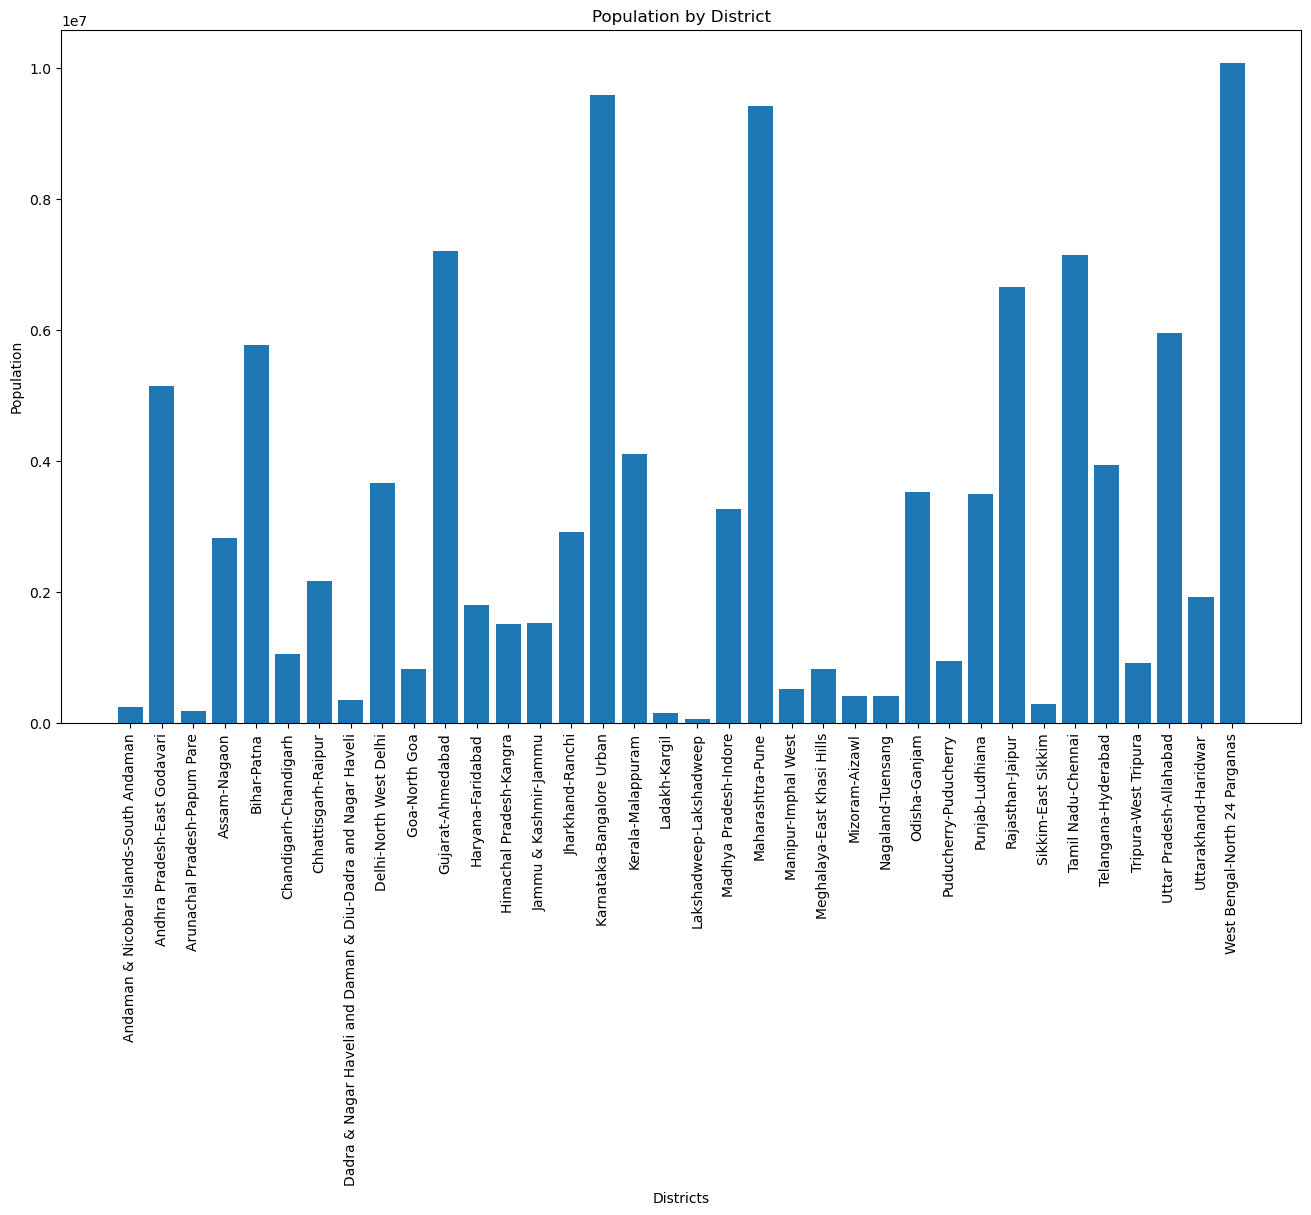

In [74]:
# 2. Visualized the most populated districts across states using a column chart for comparative analysis.
plt.figure(figsize= [16, 9])

State_district= State_dis["State"].astype("str")+ "-" + State_dis["District"].astype("str")
plt.bar(State_district, State_dis["Population"])

# Labels
plt.xlabel("Districts")
plt.ylabel("Population")
plt.title("Population by District")
plt.xticks(rotation=90)

#### 2.5: Calculate the average transaction value (ATV) for each state.

In [75]:
# 1. Calculated and displayed the average transaction value (ATV) for each state in a structured table.

# First Approach
# State_txn.groupby('State')['ATV (INR)'].mean().reset_index() #This approach will give us the incorrect result as it is like taking the avergae of average.

# More accurate approach.
avg_txn= (State_txn.groupby("State").agg(total_amount= ("Amount (INR)","sum"), total_transaction= ("Transactions", "sum"))).reset_index()
avg_txn["Avg_transactions"]= avg_txn["total_amount"]/avg_txn["total_transaction"]

avg_txn[["State", "Avg_transactions"]]

,State,Avg_transactions
0,Andaman & Nicobar Islands,2976.399
1,Andhra Pradesh,1789.828
2,Arunachal Pradesh,2766.334
3,Assam,2277.175
4,Bihar,2297.475
5,Chandigarh,2104.991
6,Chhattisgarh,1718.151
7,Dadra & Nagar Haveli and Daman & Diu,1497.232
8,Delhi,1631.940
9,Goa,1808.373


In [76]:
# 2. Highlighted the top five states with the highest and lowest average transaction values.
# Used the same df avg_txn which was created in the previous question

avg_txn.nlargest(columns="Avg_transactions", n= 5)
avg_txn.nsmallest(columns="Avg_transactions", n= 5)

,State,total_amount,total_transaction,Avg_transactions
15,Karnataka,4361395878908.125,2981044533,1463.043
7,Dadra & Nagar Haveli and Daman & Diu,18658784568.340,12462185,1497.232
20,Maharashtra,4290995253332.024,2833670154,1514.289
35,West Bengal,1452706824854.868,942286041,1541.683
8,Delhi,1649942211116.079,1011031124,1631.940


#### 2.6: Analyze app usage trends.

In [77]:
# 1. Aggregated app usage data over time, displaying the number of app opens per state and quarter.

App_open_sum= District_txn.groupby(["State","Year", "Quarter"])[["App Opens"]].sum().reset_index()

App_open_sum # Dataset used below

,State,Year,Quarter,App Opens
0,Andaman & Nicobar Islands,2018,1,0
1,Andaman & Nicobar Islands,2018,2,0
2,Andaman & Nicobar Islands,2018,3,0
3,Andaman & Nicobar Islands,2018,4,0
4,Andaman & Nicobar Islands,2019,1,0
...,...,...,...,...
499,West Bengal,2020,2,198589332
500,West Bengal,2020,3,246554831
501,West Bengal,2020,4,291721919
502,West Bengal,2021,1,316832674


Text(0.5, 1.0, 'App Open Trend- Delhi')

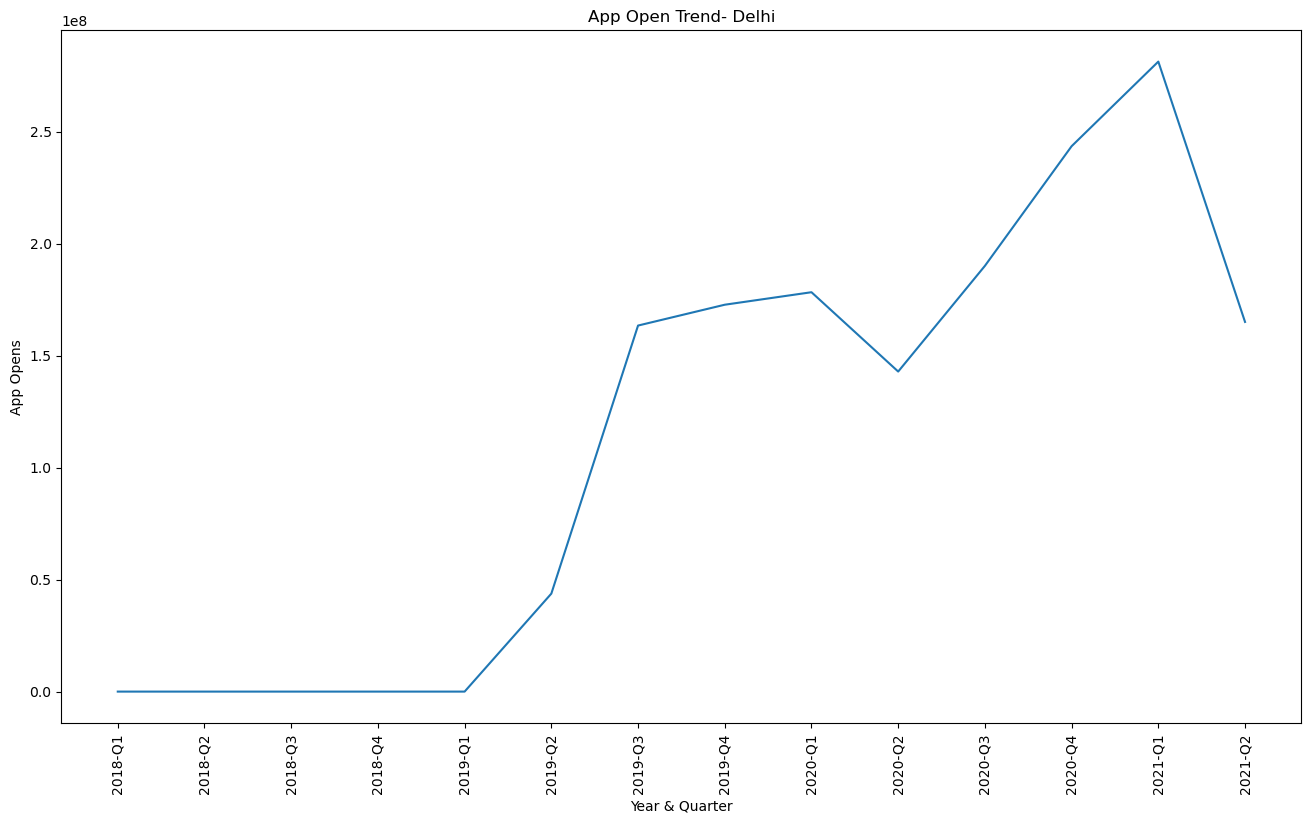

In [78]:
# 2. Visualized app usage trends using a line plot to observe engagement patterns over time.
                                                                                                 
plt.figure(figsize= [16, 9])
plt.xticks(rotation=90)
App_open_sum["Year+Quarter"]= App_open_sum["Year"].astype(str)+ "-Q" + App_open_sum["Quarter"].astype(str)

selected_state = 'Delhi'

y= App_open_sum.loc[App_open_sum["State"]== selected_state, "App Opens"]
x= App_open_sum.loc[App_open_sum["State"]== selected_state, "Year+Quarter"]

plt.plot(x,y)

plt.xlabel("Year & Quarter")
plt.ylabel("App Opens")
plt.title(f"App Open Trend- {selected_state}")

#### 2.7: Distribution of transaction types.

Text(0.5, 1.0, 'State wise Transaction- Distribution')

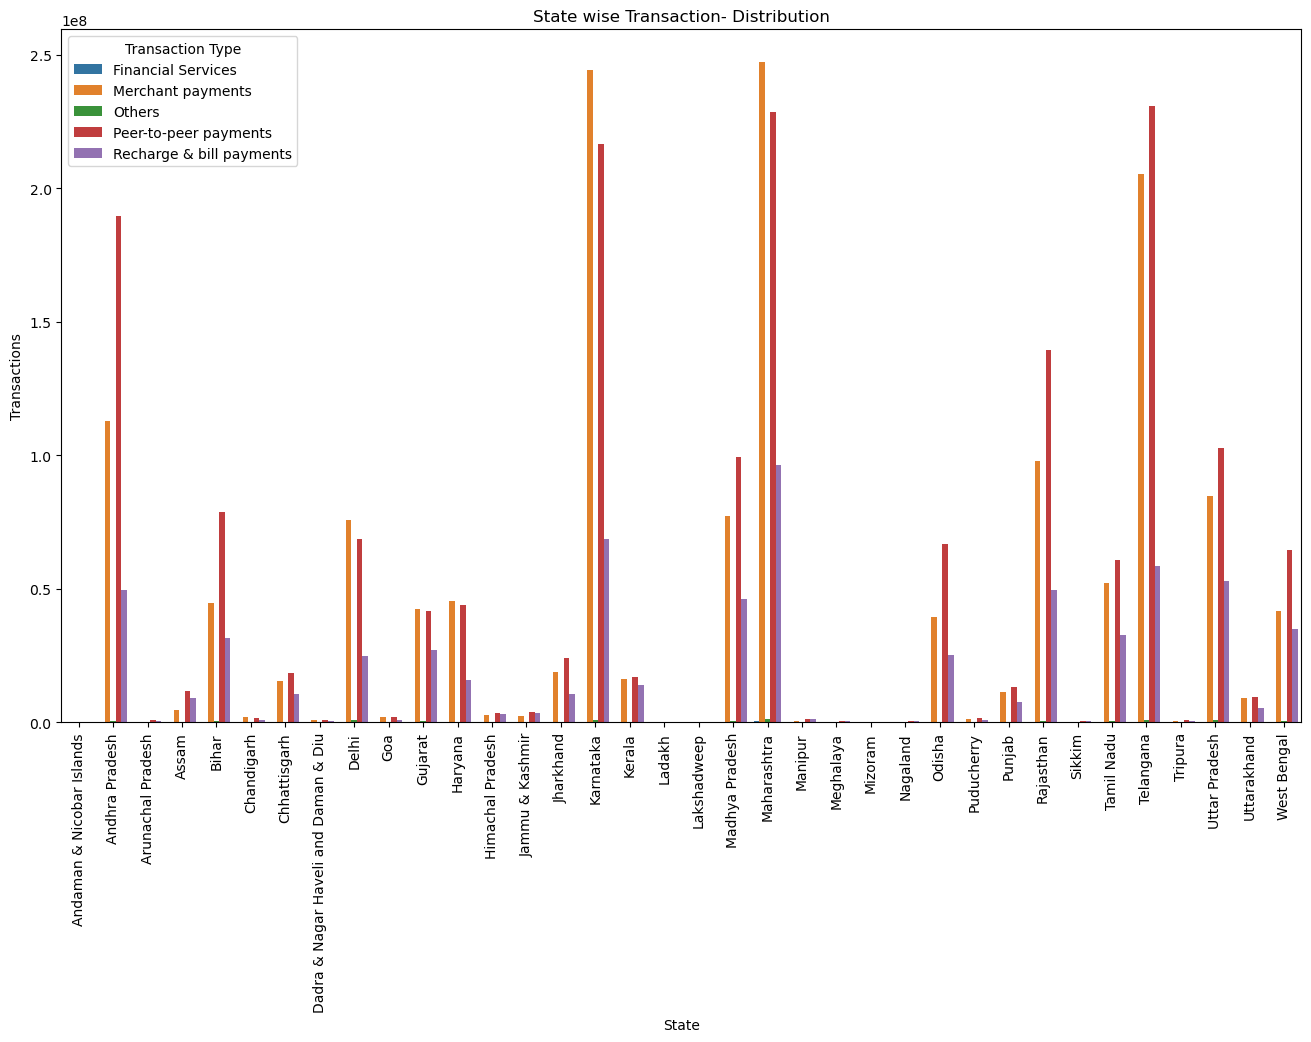

In [79]:
# 1. Illustrated transaction type distribution across states using a bar chart for the latest available quarter.

recent_year= State_txnsplit["Year"].max()
recent_quarter= State_txnsplit.loc[State_txnsplit["Year"]== State_txnsplit["Year"].max(), "Quarter"].max()

Subset= State_txnsplit.loc[(State_txnsplit["Year"]==recent_year) & (State_txnsplit["Quarter"]==recent_quarter)]
Subset_nxt = Subset.groupby(["State", "Transaction Type"])["Transactions"].sum().reset_index()

plt.figure(figsize= [16, 9])
plt.xticks(rotation=90)
sns.barplot(data= Subset_nxt, x= "State", y= "Transactions", hue= "Transaction Type")
plt.title("State wise Transaction- Distribution")

#### 2.8: Find unique mapping between district name and district code.

In [80]:
# 1. Extracted unique mappings between district names and district codes to maintain data integrity.

Unique_dis= District_demo[["District", "Code"]].drop_duplicates()

In [81]:
# 2. Exported the unique district-name-to-code mapping into a CSV file for future reference.
# 3. Export the CSV file.

Unique_dis.to_csv("Unique_district_mapping.csv", index=False)

#### Task 3: Data Quality Checks.

In [82]:
# Computed the total number of transactions, total transaction amount,
# and total registered users for each state by aggregating the respective values from the district-level dataset.

Dis_TAU = District_txn.groupby("State")[["Transactions", "Amount (INR)", "Registered Users"]].sum().reset_index()

# 2. Performed validation by comparing district-level aggregation with state-level records to identify discrepancies.
State_TAU = State_txn.groupby("State")[["Transactions", "Amount (INR)", "Registered Users"]].sum().reset_index()

# 3. Identify and display any discrepancies between the aggregated district-level data and the corresponding state-level data.
Comparison= (Dis_TAU != State_TAU).any(axis=1)

State_TAU.loc[Comparison]

,State,Transactions,Amount (INR),Registered Users
0,Andaman & Nicobar Islands,1223565,3641817860.751,408396
1,Andhra Pradesh,1781091169,3187847468851.511,158007957
2,Arunachal Pradesh,8043799,22251830956.907,1862214
3,Assam,123577981,281408712657.436,26860751
4,Bihar,713643889,1639578926751.510,115284760
5,Chandigarh,25516542,53712084630.818,3801466
6,Chhattisgarh,241908549,415635319208.151,37448388
7,Dadra & Nagar Haveli and Daman & Diu,12462185,18658784568.340,2701112
8,Delhi,1011031124,1649942211116.079,95374654
9,Goa,24481604,44271871113.085,4755320


#### Task 4: Data Merging and Advanced Analysis.

In [83]:
# 1. Merged the State_Txn and Users datasets with the District Demographics dataset to calculate the ratio of registered users to the total population for each state.
# The results were structured in a tabular format for better readability.

# Merging the dataset.
demo = District_demo.groupby("State")["Population"].sum()
combined_statetxn_dis= State_txn.merge(demo, on=["State"], how="left")

## Population Ratio.
Ratio= combined_statetxn_dis.groupby("State").apply(lambda x: x["Registered Users"].sum()/x["Population"].sum()).reset_index(name="Ratio_of_registered_users")

Text(0.5, 1.0, 'Registered:Population Ratio')

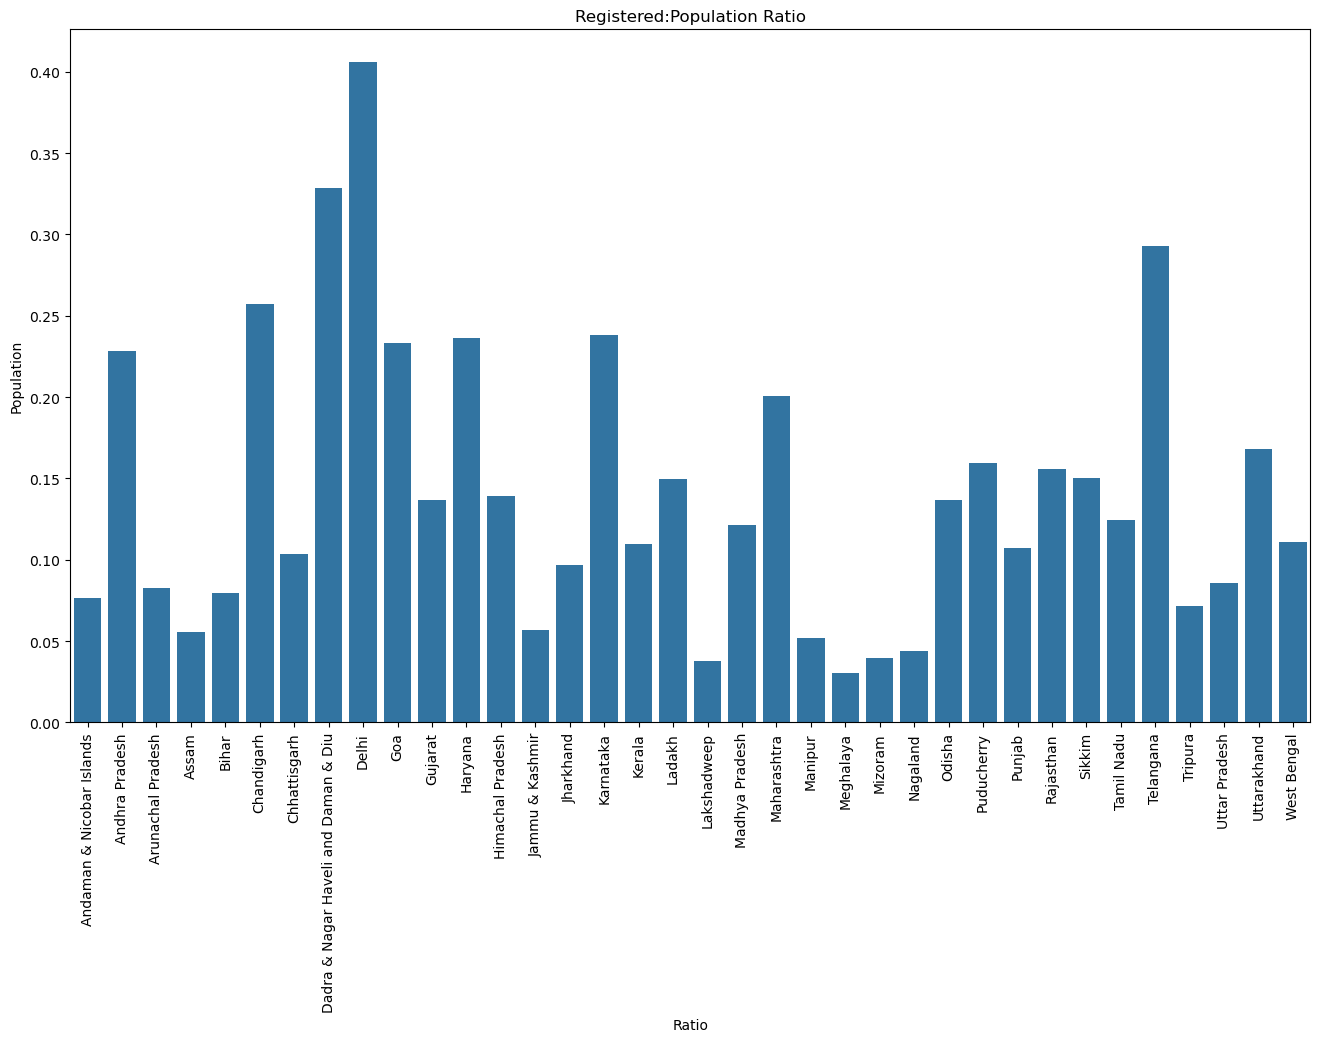

In [84]:
# 2. Created a column chart to visualize the ratio of registered users to the population across different states.
plt.figure(figsize= [16,9])

sns.barplot(data= Ratio, x= "State", y= "Ratio_of_registered_users")

plt.xticks(rotation= 90)
plt.ylabel("Population")
plt.xlabel("Ratio")
plt.title("Registered:Population Ratio")

#### 4.2: Correlate population density with transaction volume.

In [85]:
# 1. Combined the District_Txn and Users datasets with the District Demographics dataset to enhance the analysis.

combined_distxn_disdemo= District_txn.merge(District_demo[["State", "District", "Code", "Density"]], on=["State", "District", "Code"], how="left")

#Data
combined_distxn_disdemo ## Same dataset is used for the question 6.2

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens,Density
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1139848.801,2158.805,262,0,NaN
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,931663.077,2107.835,632,0,NaN
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,12560249.344,2208.201,5846,0,89.000
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3072436.908,2743.247,351,0,NaN
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1317863.083,1597.410,911,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10243,West Bengal,2021,2,Purba Bardhaman,WB19,3920729,7572502416.239,1931.402,787970,12128849,890.000
10244,West Bengal,2021,2,Purba Medinipur,WB20,6418522,15155067721.273,2361.146,946277,15491958,1076.000
10245,West Bengal,2021,2,Purulia,WB21,1895981,2790996372.037,1472.059,435131,8843358,468.000
10246,West Bengal,2021,2,South Twenty Four Parganas,WB22,6661813,13398529483.673,2011.244,1286588,19344293,NaN


In [86]:
# 2. Computed the correlation coefficient between population density and transaction volume to explore potential relationships.

combined_distxn_disdemo["Transactions"].corr(combined_distxn_disdemo["Density"])

0.3077041087559284

<Axes: title={'center': 'Transaction & Density'}, xlabel='Transactions', ylabel='Density'>

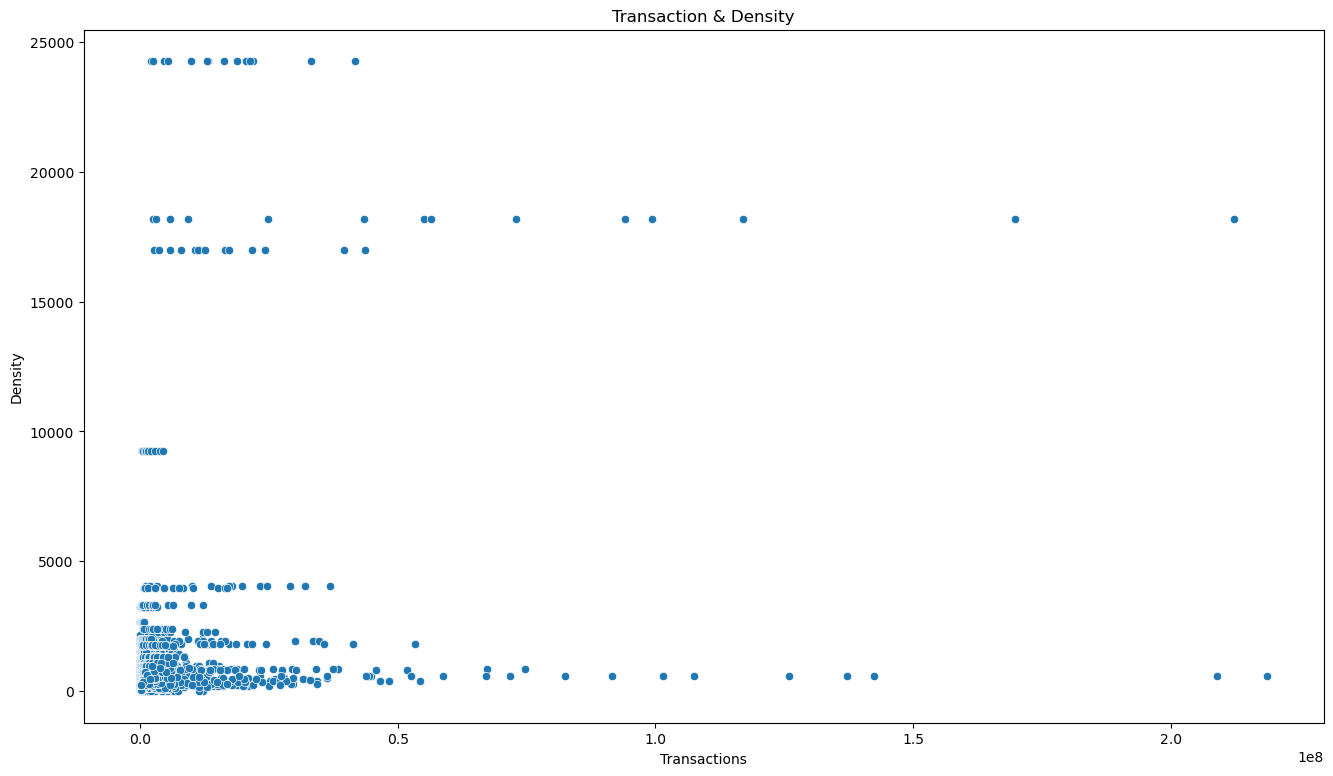

In [87]:
# 3. Plotted a scatter diagram to illustrate the correlation between population density and transaction activity.

plt.figure(figsize= [16,9])
plt.title("Transaction & Density")

a= combined_distxn_disdemo["Density"]
b= combined_distxn_disdemo["Transactions"]

#Plot
sns.scatterplot(x=b,y=a)

#### 4.3: Average transaction amount per user.

In [88]:
# 1. Joined datasets to compute and present the average transaction amount per user at the state level.
# Answer: Dataset is already present in State_txn
#State_txnsplit.merge(State_txn[["State", "Quarter", "Year", "Registered Users", "App Opens"]], on=["State", "Quarter", "Year"], how="left")


# With the help of user defined functionIdentify the top five states with the highest and lowest average transaction amount per user.
#Present the findings in a structured format.

def avg_transaction(x):
    return x["Amount (INR)"].sum()/ x["Registered Users"].sum()

# Apply the function
Avg_amount_per_user = State_txn.groupby("State").apply(avg_transaction).reset_index(name = 'Avg_amount')

In [89]:
# 2. Identified the top five states with the highest
# and lowest average transaction amounts per user, providing a comparative analysis of transaction behavior across states.

# Top 5
Avg_amount_per_user.nlargest(columns= "Avg_amount", n=5)

# Bottom 5
Avg_amount_per_user.nsmallest(columns= "Avg_amount", n=5)

,State,Avg_amount
18,Lakshadweep,5614.899
32,Tripura,5727.184
7,Dadra & Nagar Haveli and Daman & Diu,6907.816
16,Kerala,7274.847
12,Himachal Pradesh,7317.601


#### 4.4: Device brand usage ratio.

In [90]:
# 1. Integrated device usage data with transaction and user datasets to enable cross-analysis.

## Subset
Subset1= State_devicedata.groupby(["State", "Brand"]).agg(Brand_users = ("Registered Users", 'sum')).reset_index()
Subset2= State_txn.groupby("State")["Registered Users"].sum()

#Merge
Registered_users= Subset1.merge(Subset2, on= "State", how= "left")
Registered_users

,State,Brand,Brand_users,Registered Users
0,Andaman & Nicobar Islands,Apple,9334,408396
1,Andaman & Nicobar Islands,Huawei,11497,408396
2,Andaman & Nicobar Islands,Lenovo,5362,408396
3,Andaman & Nicobar Islands,Motorola,9491,408396
4,Andaman & Nicobar Islands,OnePlus,15397,408396
...,...,...,...,...
443,West Bengal,Others,17526532,144242183
444,West Bengal,Realme,9322038,144242183
445,West Bengal,Samsung,30516315,144242183
446,West Bengal,Vivo,18755122,144242183


In [91]:
# 2. Derived and tabulated device brand usage ratios for each state.

#Ratio
Registered_users["Ratio by brand"] = Registered_users["Brand_users"]/ Registered_users["Registered Users"]

#Result
Registered_users[["State","Brand", "Ratio by brand"]]

,State,Brand,Ratio by brand
0,Andaman & Nicobar Islands,Apple,0.023
1,Andaman & Nicobar Islands,Huawei,0.028
2,Andaman & Nicobar Islands,Lenovo,0.013
3,Andaman & Nicobar Islands,Motorola,0.023
4,Andaman & Nicobar Islands,OnePlus,0.038
...,...,...,...
443,West Bengal,Others,0.122
444,West Bengal,Realme,0.065
445,West Bengal,Samsung,0.212
446,West Bengal,Vivo,0.130


Text(0.5, 1.0, 'Device Brand Usage')

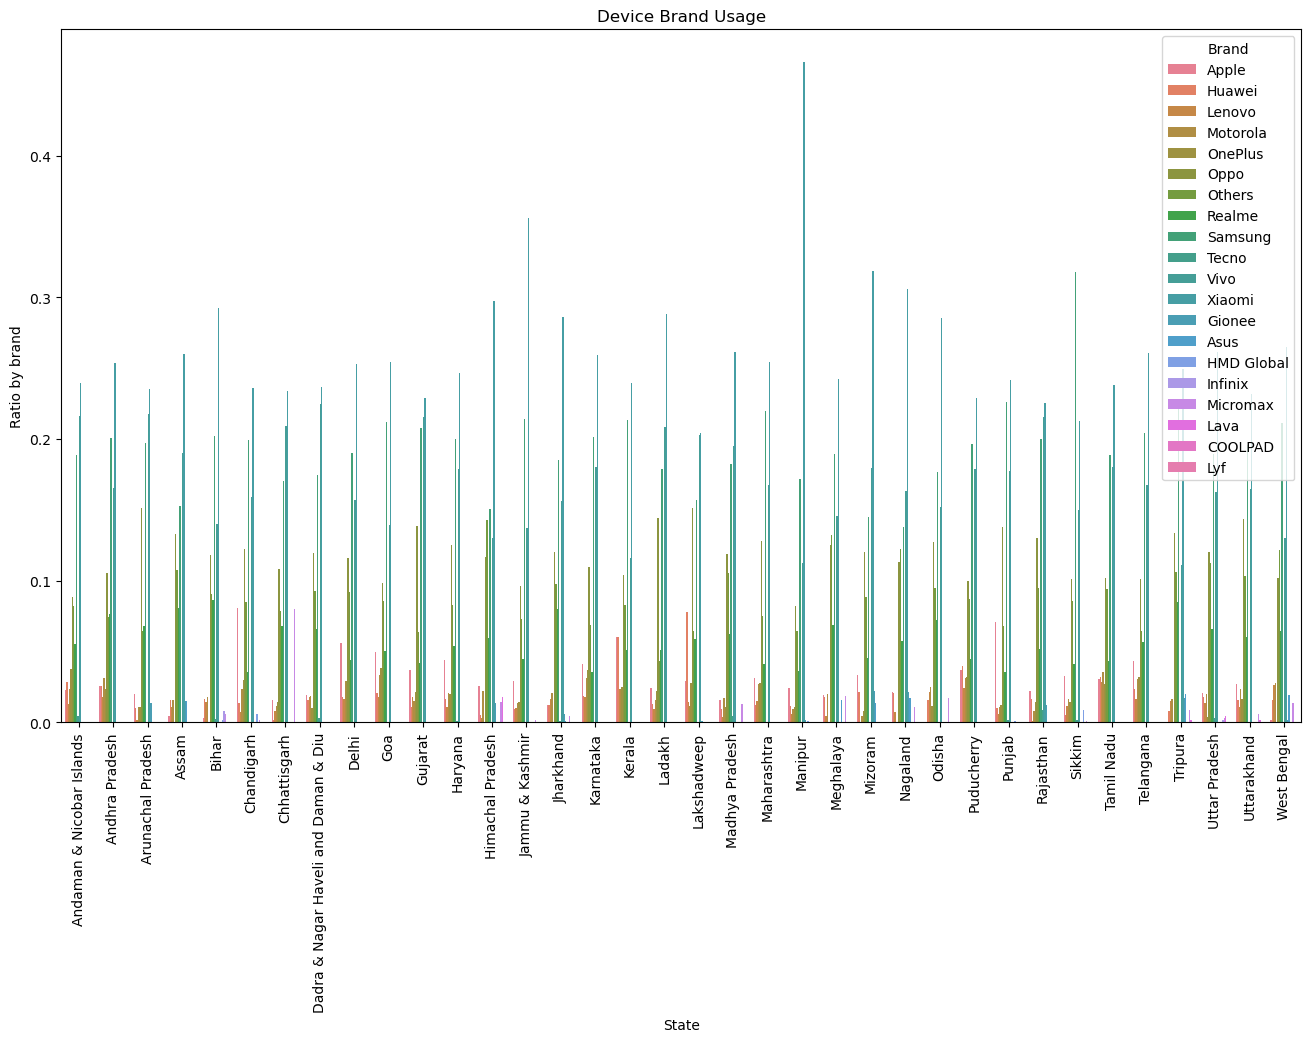

In [92]:
# 3. Visualized device brand adoption rates across states using a bar chart.

plt.figure(figsize= [16, 9])
plt.xticks(rotation=90)

sns.barplot(data= Registered_users, x= "State", y= "Ratio by brand", hue= "Brand")

plt.title("Device Brand Usage")

#### Task 5: Data Visualization.

Text(0.5, 1.0, 'Transaction Trend- Delhi')

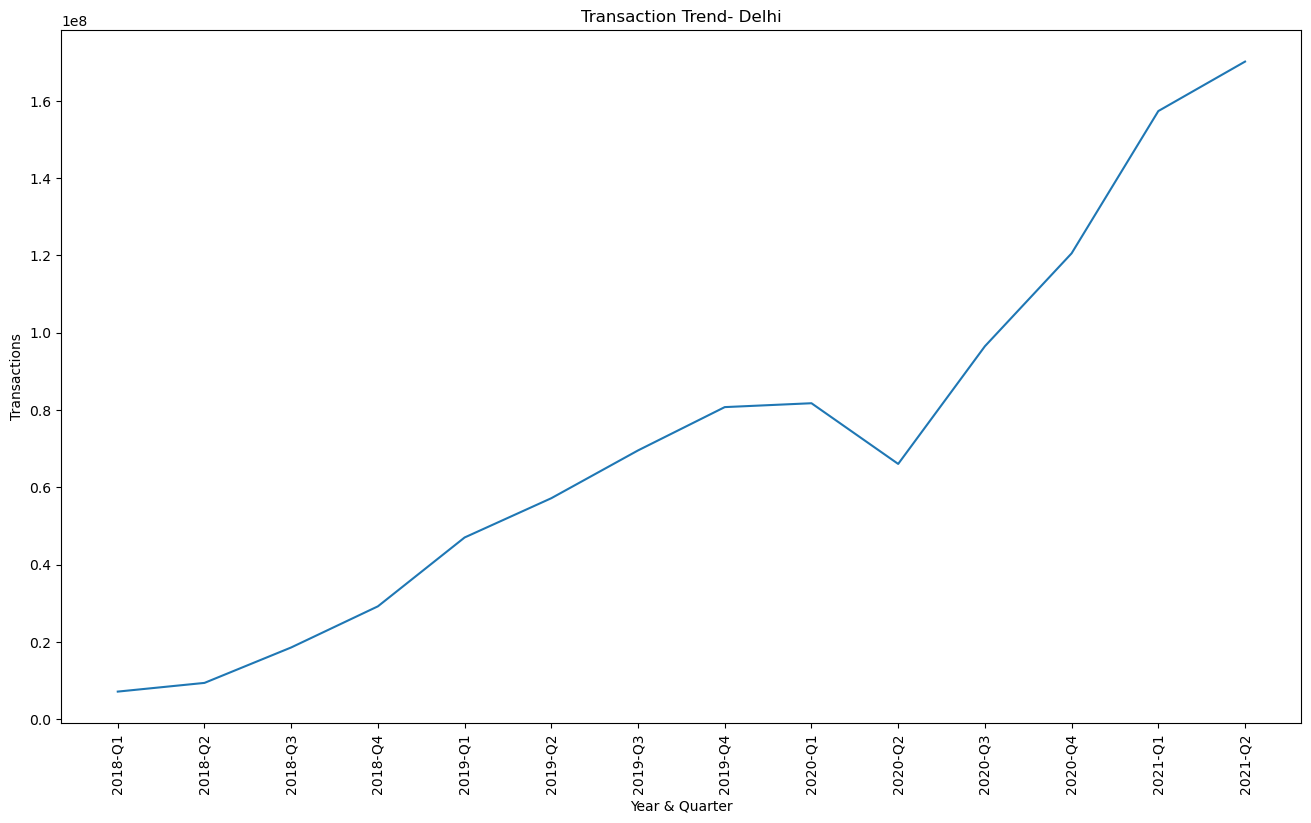

In [93]:
# 1.Developed a line plot to track the total number of transactions and total transaction amounts over time,
# categorized by years and quarters, for a selected state.


#User Input
#selected_state = str(input("Please enter the state of your choice")).capitalize()

Selected_state = "Delhi"
state_data = State_txn[State_txn["State"] == Selected_state]

state_data["Year_Quarter"] = state_data["Year"].astype(str) + "-Q" + state_data["Quarter"].astype(str)

summary = state_data.groupby("Year_Quarter").agg(total_transactions=("Transactions", "sum"),total_amount=("Amount (INR)", "sum")).reset_index()

#Plot
plt.figure(figsize= [16, 9])
plt.xticks(rotation=90)

sns.lineplot(data=summary, x= summary["Year_Quarter"], y= summary["total_transactions"])

##sns.lineplot(data=summary, x= summary["Year_Quarter"], y= summary["total_amount"], label="total_amount")
##sns.lineplot(data=summary, x= summary["Year_Quarter"], y= summary["total_transactions"], label= "total_transactions")

plt.xlabel("Year & Quarter")
plt.ylabel("Transactions")
plt.title(f"Transaction Trend- {Selected_state}")

Text(0.5, 1.0, 'Amount Trend- Delhi')

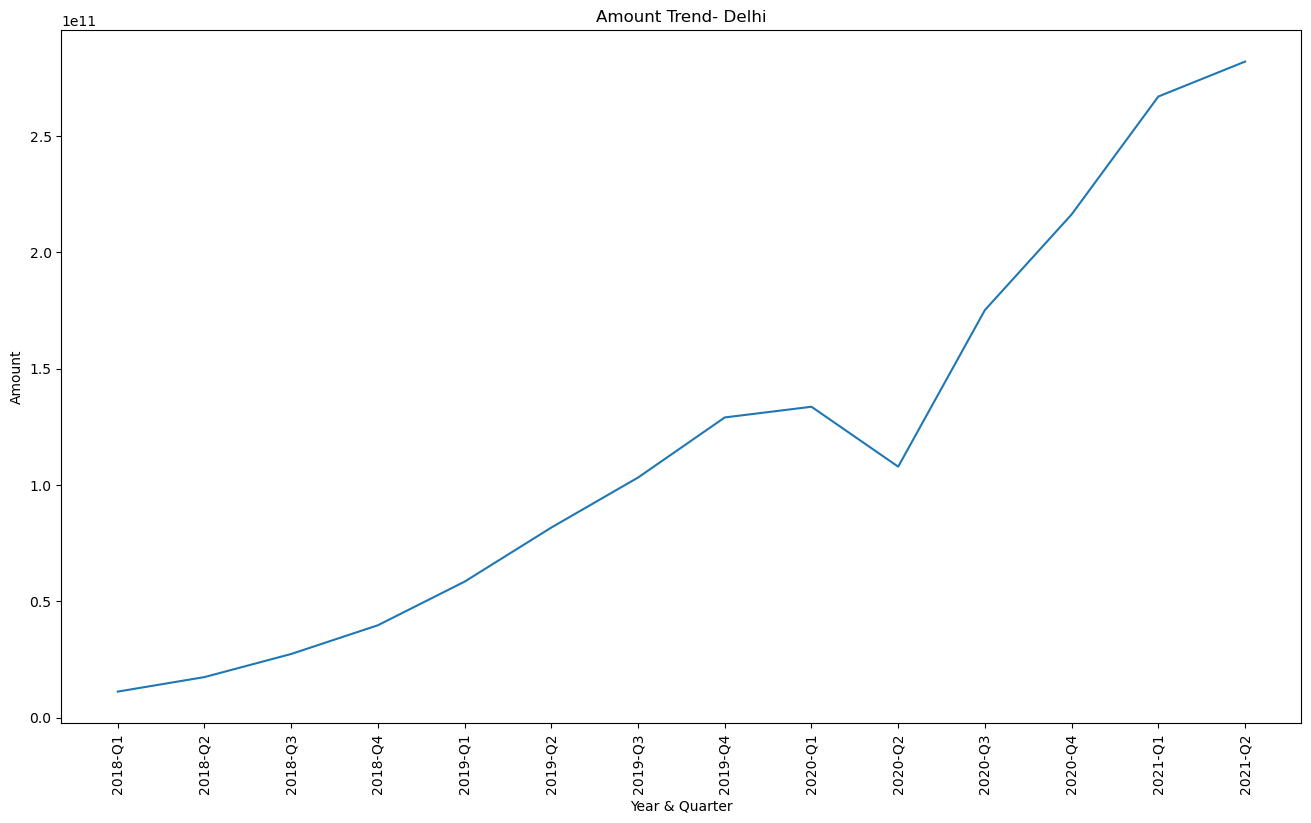

In [94]:
## Plot Amount Trend
plt.figure(figsize= [16, 9])
plt.xticks(rotation=90)

sns.lineplot(data=summary, x= summary["Year_Quarter"], y= summary["total_amount"])

plt.xlabel("Year & Quarter")
plt.ylabel("Amount")
plt.title(f"Amount Trend- {Selected_state}")

#### 5.2: Create a pie chart showing the distribution of transaction types for a specific quarter.

([<matplotlib.patches.Wedge at 0x1e388809eb0>,
 [Text(1.0999802804287122, 0.0065865520549054524, 'Financial Services'),
  Text(0.2879014439237552, 1.061655668560488, 'Merchant payments'),
  Text(-0.97840276349627, 0.5027206305522604, 'Others'),
  Text(-0.7297515648755922, -0.8230811949993904, 'Peer-to-peer payments'),
  Text(0.9537651012603314, -0.5480256669334657, 'Recharge & bill payments')],
 [Text(0.5999892438702066, 0.0035926647572211553, '0.19%'),
  Text(0.15703715123113918, 0.5790849101239025, '41.19%'),
  Text(-0.5336742346343291, 0.2742112530285056, '2.13%'),
  Text(-0.39804630811395936, -0.44895337909057653, '39.89%'),
  Text(0.5202355097783625, -0.2989230910546176, '16.60%')])

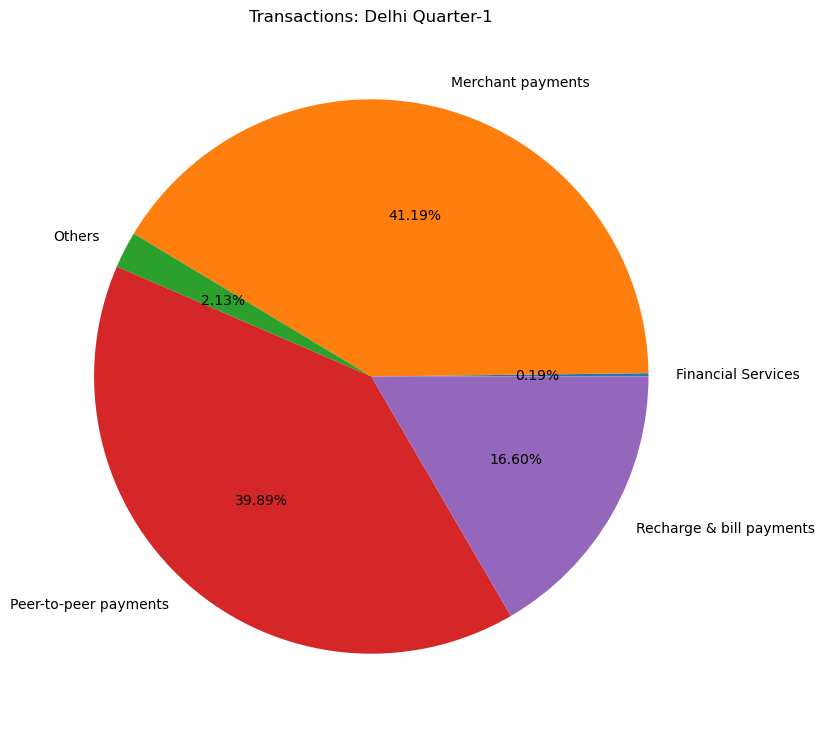

In [95]:
# 1. Designed a pie chart to illustrate the distribution of various transaction types for a specific state and quarter,
# offering insights into usage patterns.

Quarter = 1
State = "Delhi"

Subset = State_txnsplit.loc[(State_txnsplit["Quarter"] == Quarter) & (State_txnsplit["State"] == State)]

# Aggregate transaction type data
value = Subset.groupby("Transaction Type")["Transactions"].sum()

#Chart
plt.figure(figsize=[16, 9])
plt.title(f"Transactions: {State} Quarter-{Quarter}")
plt.pie(x=value, labels=value.index, autopct='%1.2f%%')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Central Delhi'),
  Text(1, 0, 'East Delhi'),
  Text(2, 0, 'New Delhi'),
  Text(3, 0, 'North Delhi'),
  Text(4, 0, 'North East Delhi'),
  Text(5, 0, 'North West Delhi'),
  Text(6, 0, 'Shahdara'),
  Text(7, 0, 'South Delhi'),
  Text(8, 0, 'South East Delhi'),
  Text(9, 0, 'South West Delhi'),
  Text(10, 0, 'West Delhi')])

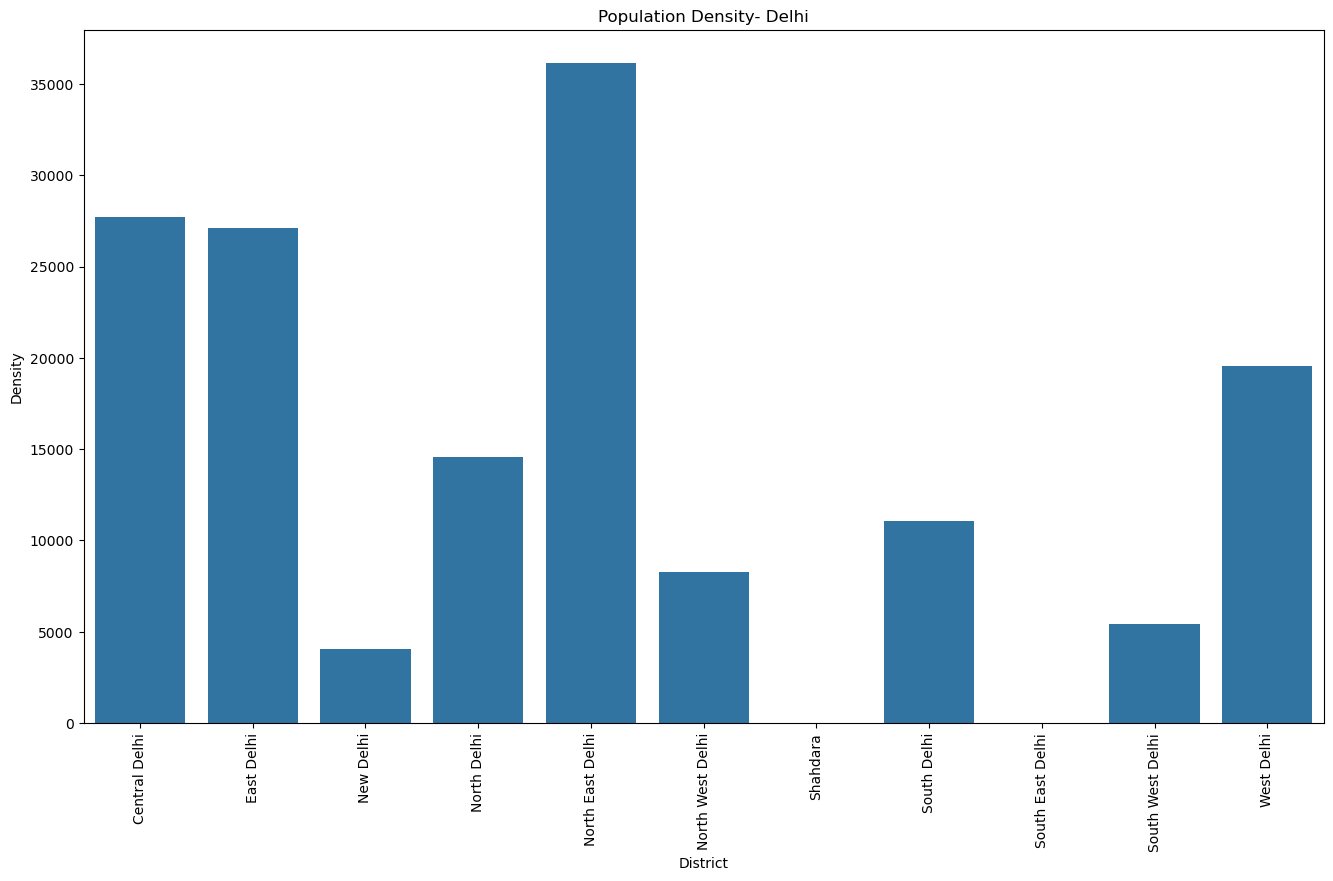

In [96]:
# 5.3: Analyzed the population density of districts within a selected state, enabling a deeper understanding of demographic variations.

Selected_state = 'Delhi'
Pop_density= District_demo[District_demo['State']== Selected_state]
a=Pop_density['District']
b=Pop_density['Density']

# Chart
plt.figure(figsize= [16,9])
plt.title(f"Population Density- {Selected_state}")
sns.barplot(x=a,y=b)
plt.xticks(rotation = 90)

#### Task 6: Insights and Conclusions [Advanced Section].

Text(0.5, 1.0, 'Transaction Trend - Delhi')

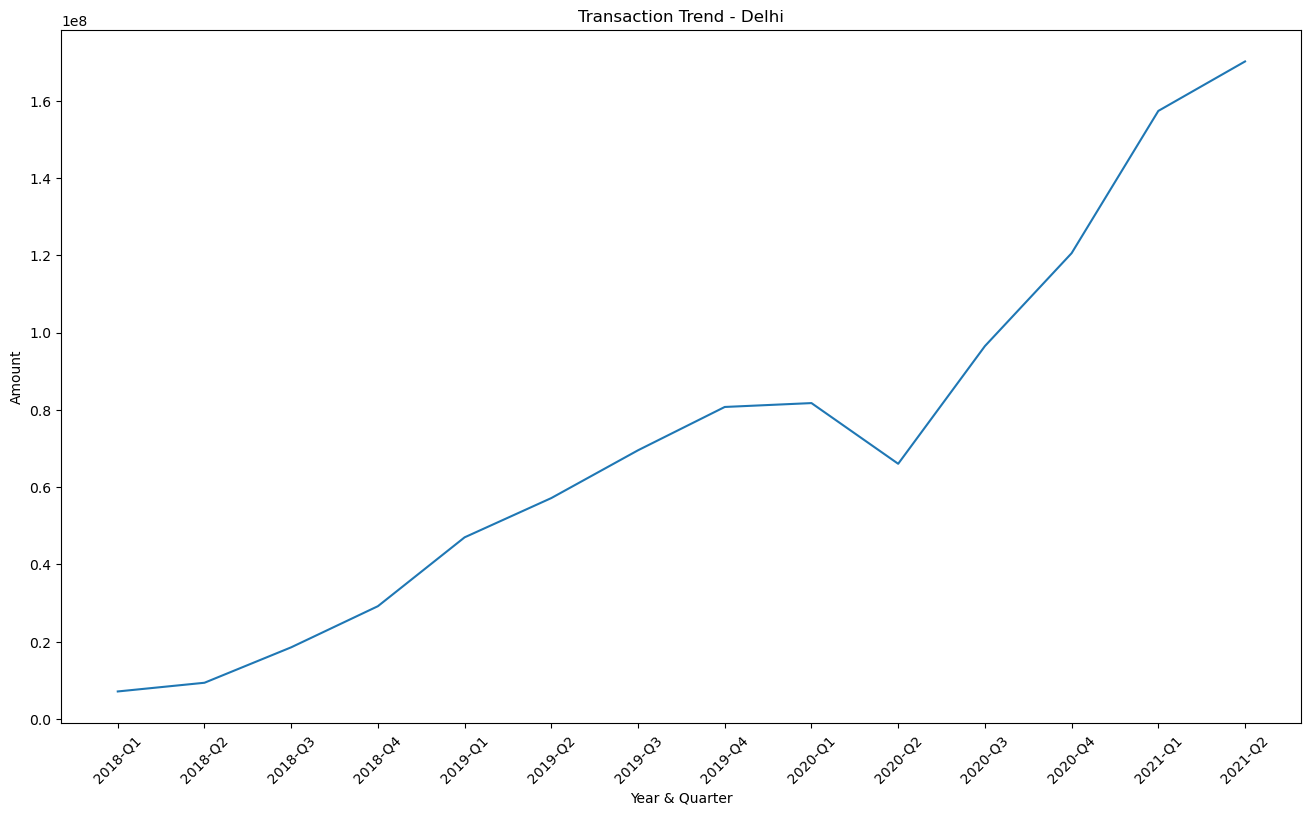

In [97]:
## 6.1 1. Conducted a deep dive into transaction data to uncover trends and patterns, summarizing key takeaways.

selected_state = "Delhi"
state_data = State_txn[State_txn["State"] == selected_state]

state_data["Year_Quarter"] = state_data["Year"].astype(str) + "-Q" + state_data["Quarter"].astype(str)

summary = state_data.groupby("Year_Quarter").agg(total_transactions=("Transactions", "sum"), total_amount= ("Amount (INR)", "sum")).reset_index()

#linepolt
plt.figure(figsize =[16,9])
plt.xticks(rotation=45)

sns.lineplot(data=summary, x= summary["Year_Quarter"], y= summary["total_transactions"])

plt.xlabel("Year & Quarter")
plt.ylabel("Amount")
plt.title(f"Transaction Trend - {selected_state}")

In [98]:
# 6.2 Investigated the correlation between demographic factors, such as population density, and transaction metrics like transaction volume.
# Key insights from this analysis were summarized to highlight potential trends and relationships.

Density= District_demo.groupby("State").agg(total_density= ("Density", "sum")).reset_index()
Transactions= District_txn.groupby("State").agg(total_transaction= ("Transactions", "sum")).reset_index()

## Merge
Merged_dataset= Density.merge(Transactions, on= ["State"], how= "left")

##Correlation
Merged_dataset["total_density"].corr(Merged_dataset["total_transaction"])

0.39684437273582057

Text(0.5, 1.0, 'Correlation between Population Density and Transactions')

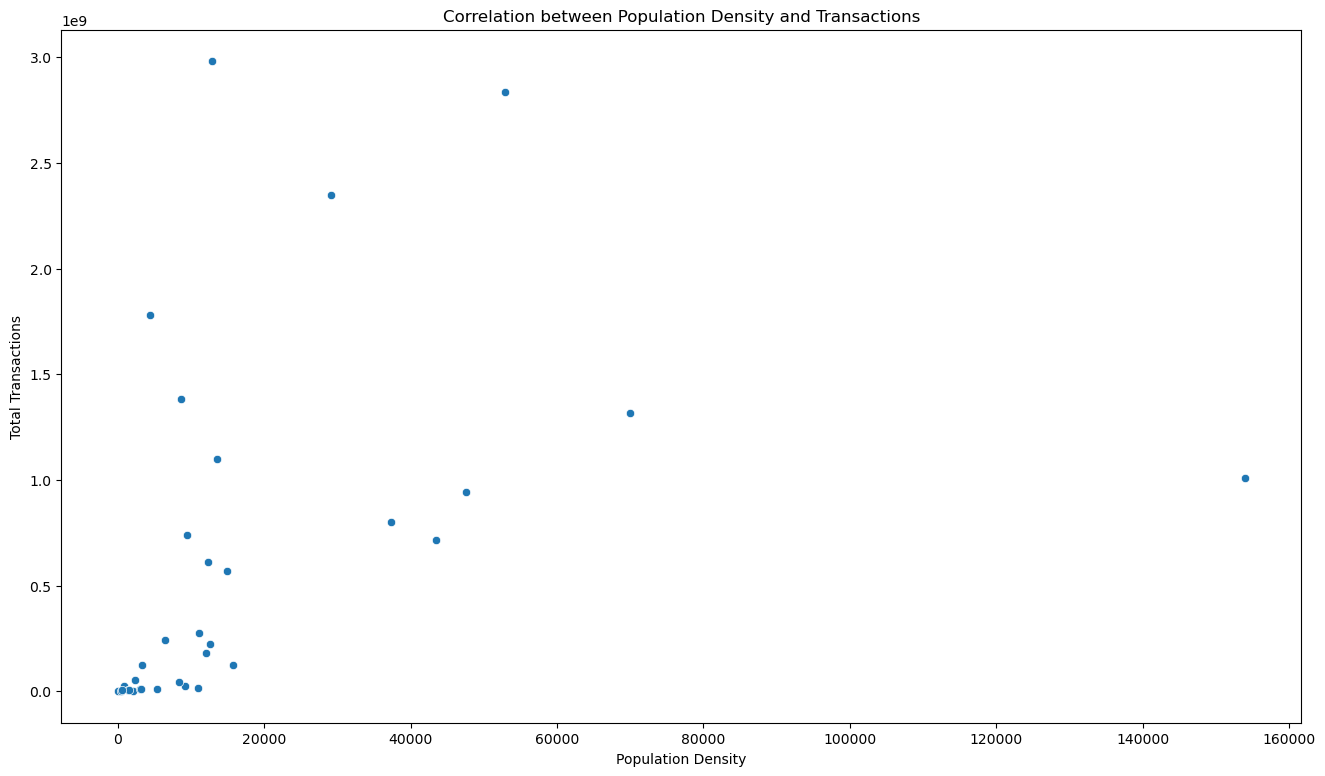

In [99]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=Merged_dataset, x="total_density", y="total_transaction")

# Labels and Title
plt.xlabel("Population Density")
plt.ylabel("Total Transactions")
plt.title("Correlation between Population Density and Transactions")

In [100]:
# 6.3: Compiled key insights and provided data-driven recommendations for actionable business strategies.

In [101]:
# # Checking the corrl between total transaction and total amount.
# summary["total_transactions"].corr(summary["total_amount"])

### Key Findings & Recommendations

1. Transaction Volume by State: Karnataka records the highest transaction volume, exceeding 2.98 billion transactions, with an Average Transaction Value (ATV) of ₹1,463.04. Lakshadweep has the lowest transaction volume, with just 71,610+ transactions and an ATV of ₹2,683.40.
    Recommendation: To drive higher adoption in Lakshadweep and other low-transaction states, targeted promotional campaigns, cashback offers, and educational initiatives on digital transactions can be implemented.


2. Market Share of Mobile Brands: Across all 36 states/UTs, Xiaomi holds the highest number of registered users and leads the market in terms of device penetration.
    Recommendation: Strategic partnerships with competing brands (Samsung, Vivo, Oppo, etc.) could help expand the PhonePe user base by offering exclusive promotions, cashback incentives, or bundled deals for digital transactions.


3. Average Transaction Value (ATV) Trends: Ladakh reports the highest ATV of ₹3,514.15, whereas Karnataka has the lowest, at ₹1,463.04.
    Recommendation: The higher ATV in Ladakh suggests users primarily engage in high-value transactions. To encourage smaller, everyday transactions, targeted promotions such as micro-cashbacks, referral bonuses, or discounts for low-value payments can be introduced.


4. Most Common Transaction Types: Merchant Payments and Peer-to-Peer (P2P) Transactions dominate across all states, contributing 70-80% of total transactions in the latest year and quarter.
    Recommendation: To diversify transaction types, incentivizing bill payments, recharges, and government service transactions through limited-time discounts or reward-based campaigns can drive engagement in underutilized categories.


5. Spending per Registered User: Telangana has the highest transaction value per registered user (₹30,653.51), while Lakshadweep has the lowest (₹5,614.90).
    Recommendation: In low-spending regions, digital literacy campaigns, merchant onboarding initiatives, and promotional incentives for first-time and repeat transactions can help boost adoption and spending.


6. Long-Term Transaction Trends: Online transactions have shown consistent growth since 2018. However, Q2 2020 experienced a sharp decline across all states, likely due to the COVID-19 outbreak. Following this dip, transactions rebounded sharply, indicating strong post-pandemic digital adoption.
    Recommendation: To sustain this growth, PhonePe can continue to capitalize on digital transformation trends by expanding into untapped rural markets, enhancing user engagement strategies, and promoting UPI-based payment solutions.